In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()


a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train

In [2]:
sleepdata = pd.read_csv("sleepdisorder-filtered.csv")
Dsteps = pd.DataFrame(sleepdata["Daily Steps"])
Qsleep = pd.DataFrame(sleepdata["Quality of Sleep"])
Sduration = pd.DataFrame(sleepdata["Sleep Duration"])
age = pd.DataFrame(sleepdata["Age"])

Qsleep against Dsteps

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Dsteps_Train, Dsteps_Test, Qsleep_Train, Qsleep_Test, Sduration_Train, Sduration_Test, age_Train, age_Test = train_test_split(Dsteps, Qsleep, Sduration, age, test_size = 0.20)


linreg = LinearRegression()       
linreg.fit(Dsteps_Train, Qsleep_Train)      


print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [6.56695123]
Coefficients of Regression 	: a =  [[9.17243577e-05]]


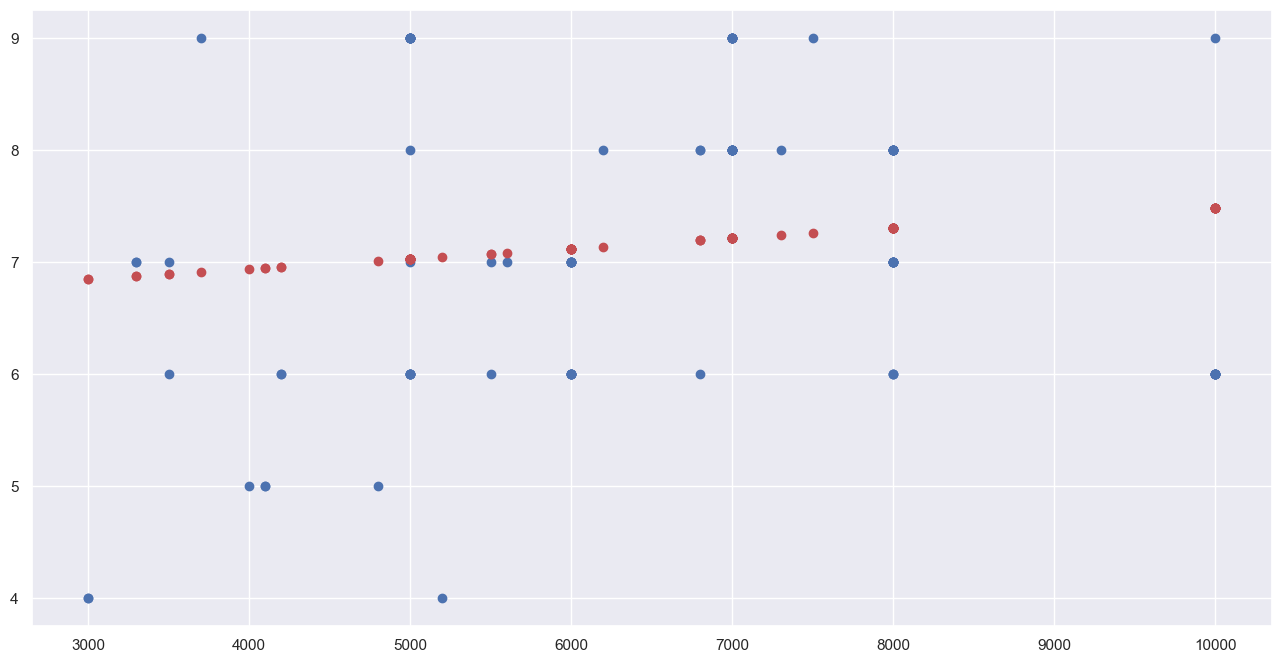

In [4]:
Qsleep_Train_Pred=linreg.predict(Dsteps_Train)
Qsleep_Test_Pred=linreg.predict(Dsteps_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Dsteps_Train,Qsleep_Train)
plt.scatter(Dsteps_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [5]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Dsteps_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Dsteps_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error( Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01556241972705108
Mean Squared Error (MSE) 	: 1.680943253897438

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.004895382129292525
Mean Squared Error (MSE) 	: 1.273957607226041



Both the training set and the test set have very low R-squared values, indicatinf that model does not explain much of the ariance in the quality of sleep based on daily steps alone. In practical terms, knowing the number of daily steps a person takes doesnt give us much information on the quality of sleep.
The MSE values are high, suggesting predictions made by the model are quite far from the actual values.

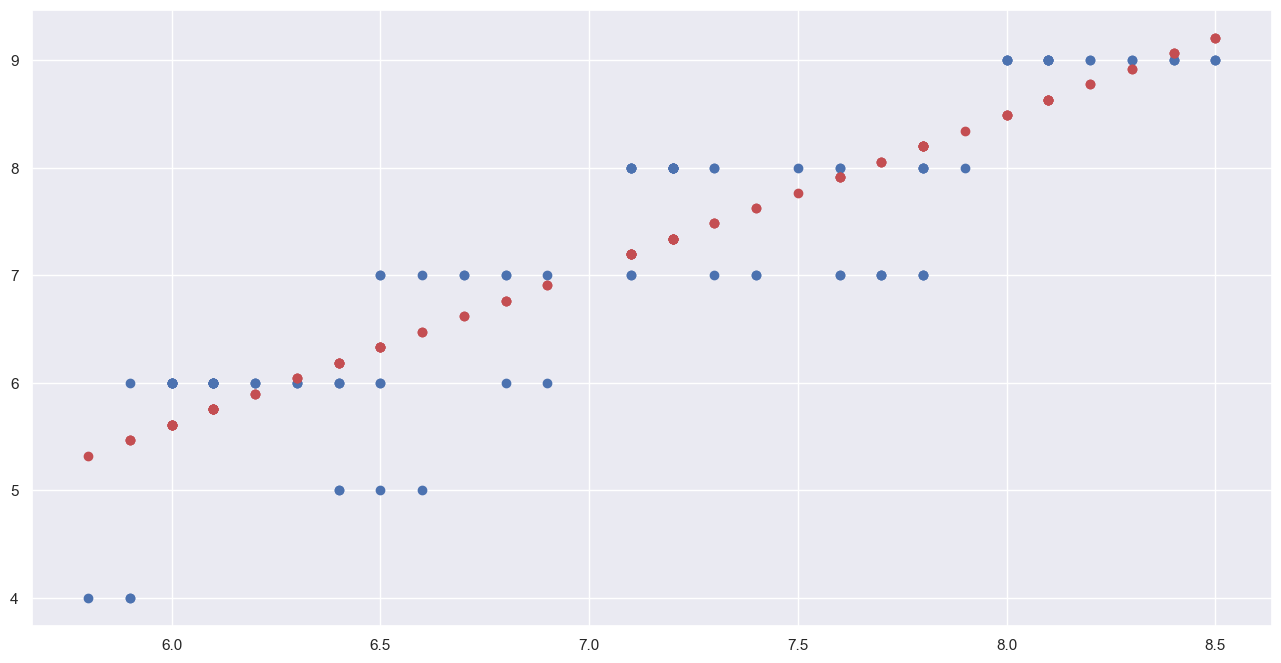

In [7]:
linreg.fit(Sduration_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(Sduration_Train)
Qsleep_Test_Pred=linreg.predict(Sduration_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Sduration_Train,Qsleep_Train)
plt.scatter(Sduration_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [8]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Sduration_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Sduration_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7779270601458348
Mean Squared Error (MSE) 	: 0.3791931734437952

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6093784445384137
Mean Squared Error (MSE) 	: 0.49521105477896366



The High R-squared values of both train and test datasets suggest that there is a strong linear relasionship between sleep duration and quality of sleep.
Low Mean Squared Error suggest that predictions are relatively close to the actual observed values.

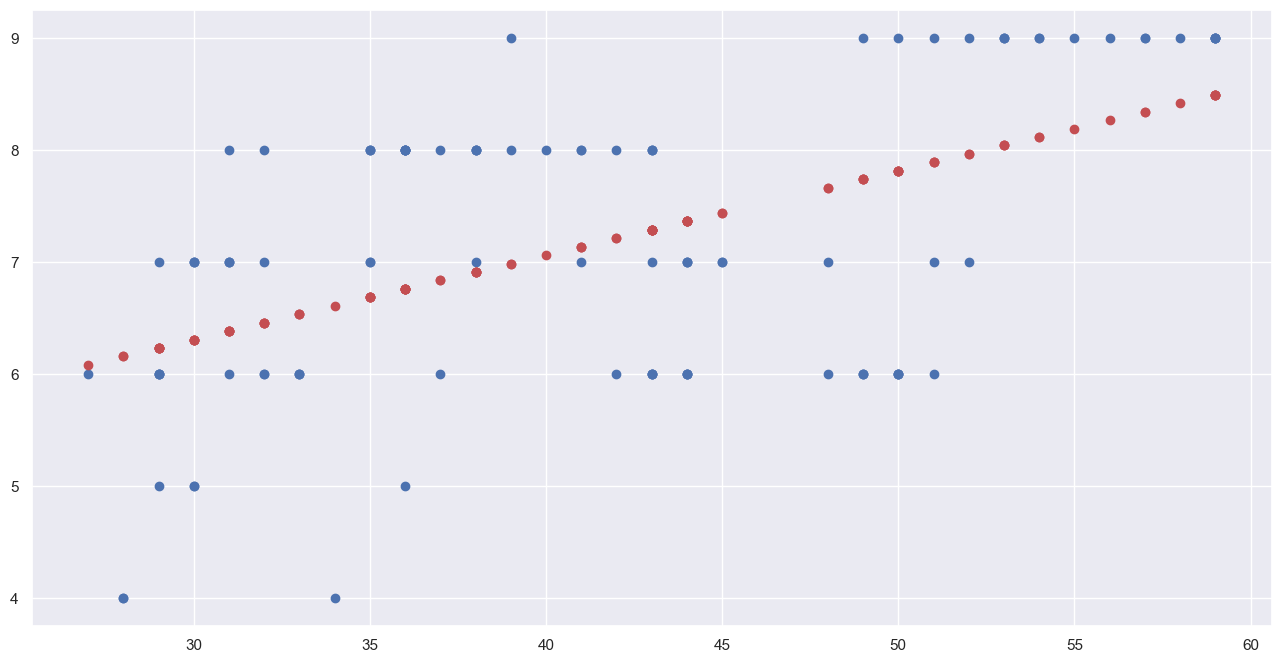

In [9]:
linreg.fit(age_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(age_Train)
Qsleep_Test_Pred=linreg.predict(age_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(age_Train,Qsleep_Train)
plt.scatter(age_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [10]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(age_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(age_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2780586936355921
Mean Squared Error (MSE) 	: 1.2327265770438016

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.008403528386741743
Mean Squared Error (MSE) 	: 1.257097893746394



Moderate R-squared Values for both the training set and test set, indicating that age explains a certain portion of the variability in Quality of Sleep, but not as much as Sleep Duration does. The model captures some of the trends in the data but leaves a significant amount unexplained.
High Mean Squared Error (MSE): The MSE values are higher than in the Sleep Duration model, suggesting that the predictions are less accurate. The MSE is somewhat higher in the test set, which suggests that the model's predictions are not as robust on new, unseen data.

Sleep Duration is the best predictor for quality of sleep. It has the highest variance(R^2) and lowest mean squared error(MSE). Therefore, Sleep Duration has the least error in comparison to the other 2 models.

In [11]:
BMI = pd.DataFrame(sleepdata['BMI Category'])
SL = pd.DataFrame(sleepdata['Stress Level'])
QOS = pd.DataFrame(sleepdata['Quality of Sleep'])

BMI_train, BMI_test, SL_train, SL_test, QOS_train, QOS_test = train_test_split(BMI, SL, QOS, test_size = 0.25)

#print("Train Set :", BMI_train.shape, SL_train.shape, QOS_train.shape)
#print("Test Set :", BMI_test.shape, SL_test.shape, QOS_test.shape)

[Text(0.5, 0.875, 'Quality of Sleep <= 7.5\ngini = 0.495\nsamples = 96\nvalue = [53, 43]\nclass = Normal'),
 Text(0.25, 0.625, 'Quality of Sleep <= 4.5\ngini = 0.481\nsamples = 57\nvalue = [23, 34]\nclass = Overweight'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Overweight'),
 Text(0.375, 0.375, 'Quality of Sleep <= 5.5\ngini = 0.489\nsamples = 54\nvalue = [23, 31]\nclass = Overweight'),
 Text(0.25, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Normal'),
 Text(0.5, 0.125, 'gini = 0.475\nsamples = 49\nvalue = [19, 30]\nclass = Overweight'),
 Text(0.75, 0.625, 'Quality of Sleep <= 8.5\ngini = 0.355\nsamples = 39\nvalue = [30, 9]\nclass = Normal'),
 Text(0.625, 0.375, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = Normal'),
 Text(0.875, 0.375, 'gini = 0.494\nsamples = 18\nvalue = [10, 8]\nclass = Normal')]

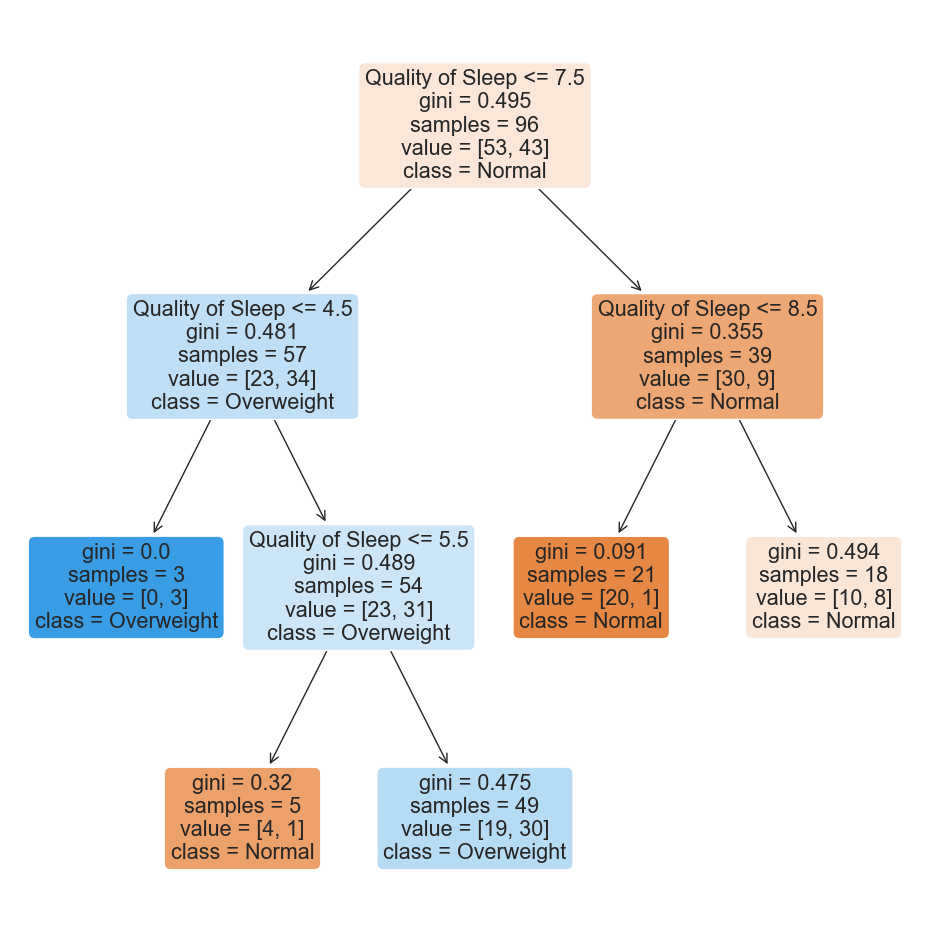

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(QOS_train, BMI_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Quality of Sleep"], 
          class_names=["Normal", "Overweight"])

Classification Accuracy 	: 0.6979166666666666
True Positive Rate 	: 0.6875
False Positive Rate 	: 0.3125


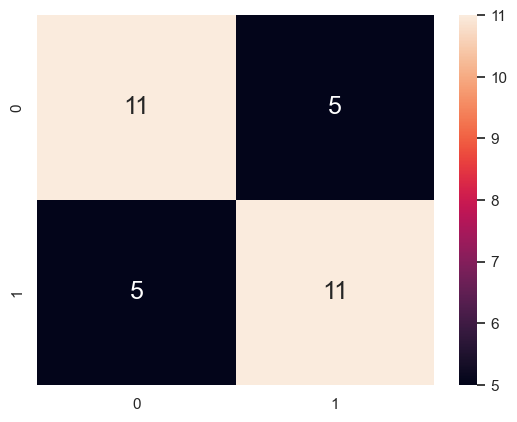

In [14]:
from sklearn.metrics import confusion_matrix
BMI_test_pred = dectree.predict(QOS_test)
CM = confusion_matrix(BMI_test, BMI_test_pred)
sb.heatmap(CM, annot = True, fmt=".0f", annot_kws={"size": 18})

print("Classification Accuracy \t:", dectree.score(QOS_train, BMI_train))
print("True Positive Rate \t:", CM[1][1]/(CM[1][0]+CM[1][1]))
print("False Positive Rate \t:", CM[0][1]/(CM[0][0]+CM[0][1]))

[Text(0.5, 0.9, 'Quality of Sleep <= 7.5\ngini = 0.495\nsamples = 96\nvalue = [53, 43]\nclass = Normal'),
 Text(0.25, 0.7, 'Quality of Sleep <= 4.5\ngini = 0.481\nsamples = 57\nvalue = [23, 34]\nclass = Overweight'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Overweight'),
 Text(0.375, 0.5, 'Quality of Sleep <= 5.5\ngini = 0.489\nsamples = 54\nvalue = [23, 31]\nclass = Overweight'),
 Text(0.25, 0.3, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Normal'),
 Text(0.5, 0.3, 'Quality of Sleep <= 6.5\ngini = 0.475\nsamples = 49\nvalue = [19, 30]\nclass = Overweight'),
 Text(0.375, 0.1, 'gini = 0.452\nsamples = 29\nvalue = [10, 19]\nclass = Overweight'),
 Text(0.625, 0.1, 'gini = 0.495\nsamples = 20\nvalue = [9, 11]\nclass = Overweight'),
 Text(0.75, 0.7, 'Quality of Sleep <= 8.5\ngini = 0.355\nsamples = 39\nvalue = [30, 9]\nclass = Normal'),
 Text(0.625, 0.5, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = Normal'),
 Text(0.875, 0.5, 'gini = 0.494\nsamples

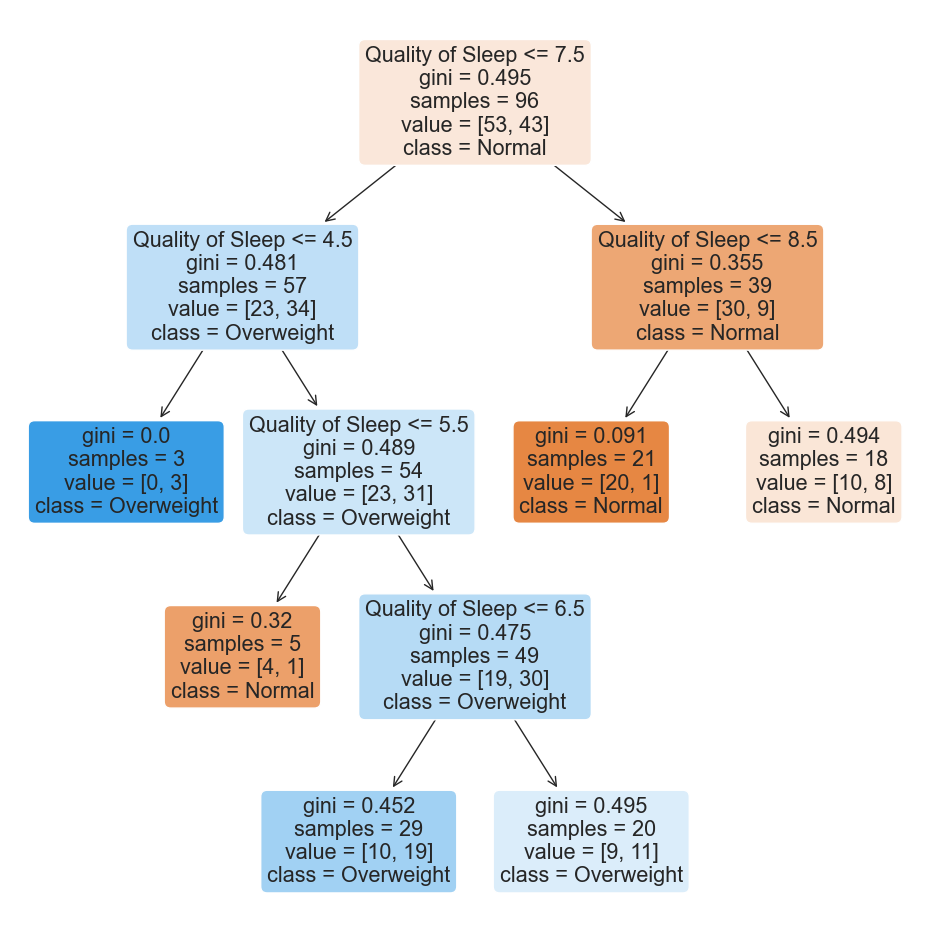

In [17]:
dectree2 = DecisionTreeClassifier(max_depth = 4)
dectree2.fit(QOS_train, BMI_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["Quality of Sleep"], 
          class_names=["Normal", "Overweight"])

Classification Accuracy 	: 0.6979166666666666
True Positive Rate 	: 0.6875
False Positive Rate 	: 0.3125


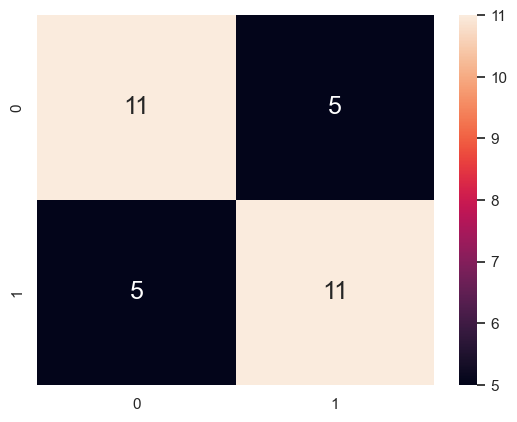

In [18]:
BMI_test_pred = dectree2.predict(QOS_test)
CM = confusion_matrix(BMI_test, BMI_test_pred)
sb.heatmap(CM, annot = True, fmt=".0f", annot_kws={"size": 18})

print("Classification Accuracy \t:", dectree.score(QOS_train, BMI_train))
print("True Positive Rate \t:", CM[1][1]/(CM[1][0]+CM[1][1]))
print("False Positive Rate \t:", CM[0][1]/(CM[0][0]+CM[0][1]))